In [21]:
import json
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import pandas as pd
import os

In [22]:
# !pip install opencv-python

In [31]:
# df = pd.read_csv('./EfficientDet/efficientdet_submission_50.csv')
# df = pd.read_csv('./Ensemble/submission/first.csv')
df = pd.read_csv('./result/efficientD4.csv')
#result/
#./result/ens0.601_detRS_iou_0.5_skip_0.01_602.csv
df

PredictionString       image_id
0     7 0.9949851 216.30627 58.95082 458.2666 470.66...  test/0000.jpg
1     6 0.86491543 763.28906 659.7035 896.49243 980....  test/0001.jpg
2     1 0.9508293 279.78094 292.93982 997.90204 748....  test/0002.jpg
3     9 0.74586344 -10.739349 163.18677 1002.052 889...  test/0003.jpg
4     1 0.9154699 198.22614 282.70044 868.5993 767.5...  test/0004.jpg
...                                                 ...            ...
4866  1 0.63282 285.5307 342.85245 671.14856 682.67957   test/4866.jpg
4867   3 0.9775 411.09558 334.46732 779.1422 690.71277   test/4867.jpg
4868  7 0.9195333 123.815094 458.4921 756.46204 850....  test/4868.jpg
4869  1 0.9637876 1.7413025 203.749 1012.7145 918.40...  test/4869.jpg
4870  4 0.9588241 364.77454 200.55164 632.1234 841.7...  test/4870.jpg

[4871 rows x 2 columns]

In [24]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_annotations(df, image_num):
    # anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    labels = []
    anns = []
    ann = []
    if type(df.loc[image_num]['PredictionString']) == float:
        return anns
    
    cur_df = df.loc[image_num]['PredictionString'].split()
    for j, _ in enumerate(cur_df):
        if j % 6 == 0:
            labels.append(int(cur_df[j]))
        elif j % 6 == 1:
            continue
        else:
            ann.append(float(cur_df[j]))
            if len(ann) == 4:
                anns.append(ann)
                ann = []
    return anns, labels

def plot_bbox(image_list, anns, labels):
    classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
    # one picture size
    fig_size = 7
    # num of pictures in one raw
    cols = 4
    
    # num of raw is setted by num of all picture and cols
    if len(image_list)%cols == 0 :
        raws = len(image_list)//cols
    else :
        raws = len(image_list)//cols + 1
    fig = plt.figure(figsize=(cols*fig_size+1 ,fig_size*(len(image_list)//cols + 1)))#
    for i, image in enumerate(image_list) :
        for ann, label in zip(anns[i], labels[i]):
            color = list(np.random.random(size=3) * 256)
            xmin, ymin, xmax, ymax = ann
            image_list[i] = cv2.putText(image, classes[label], (int((xmin)), int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 3)
            image_list[i] = cv2.rectangle(image, (int(xmin),int(ymin)), (int(xmax), int(ymax)), color, 3)
            ax = fig.add_subplot(raws, cols, i+1)
            ax.imshow(image_list[i])
            ax.set_xticks([]), ax.set_yticks([])
    fig.tight_layout()
    plt.show()    
    
def plot_box(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image)

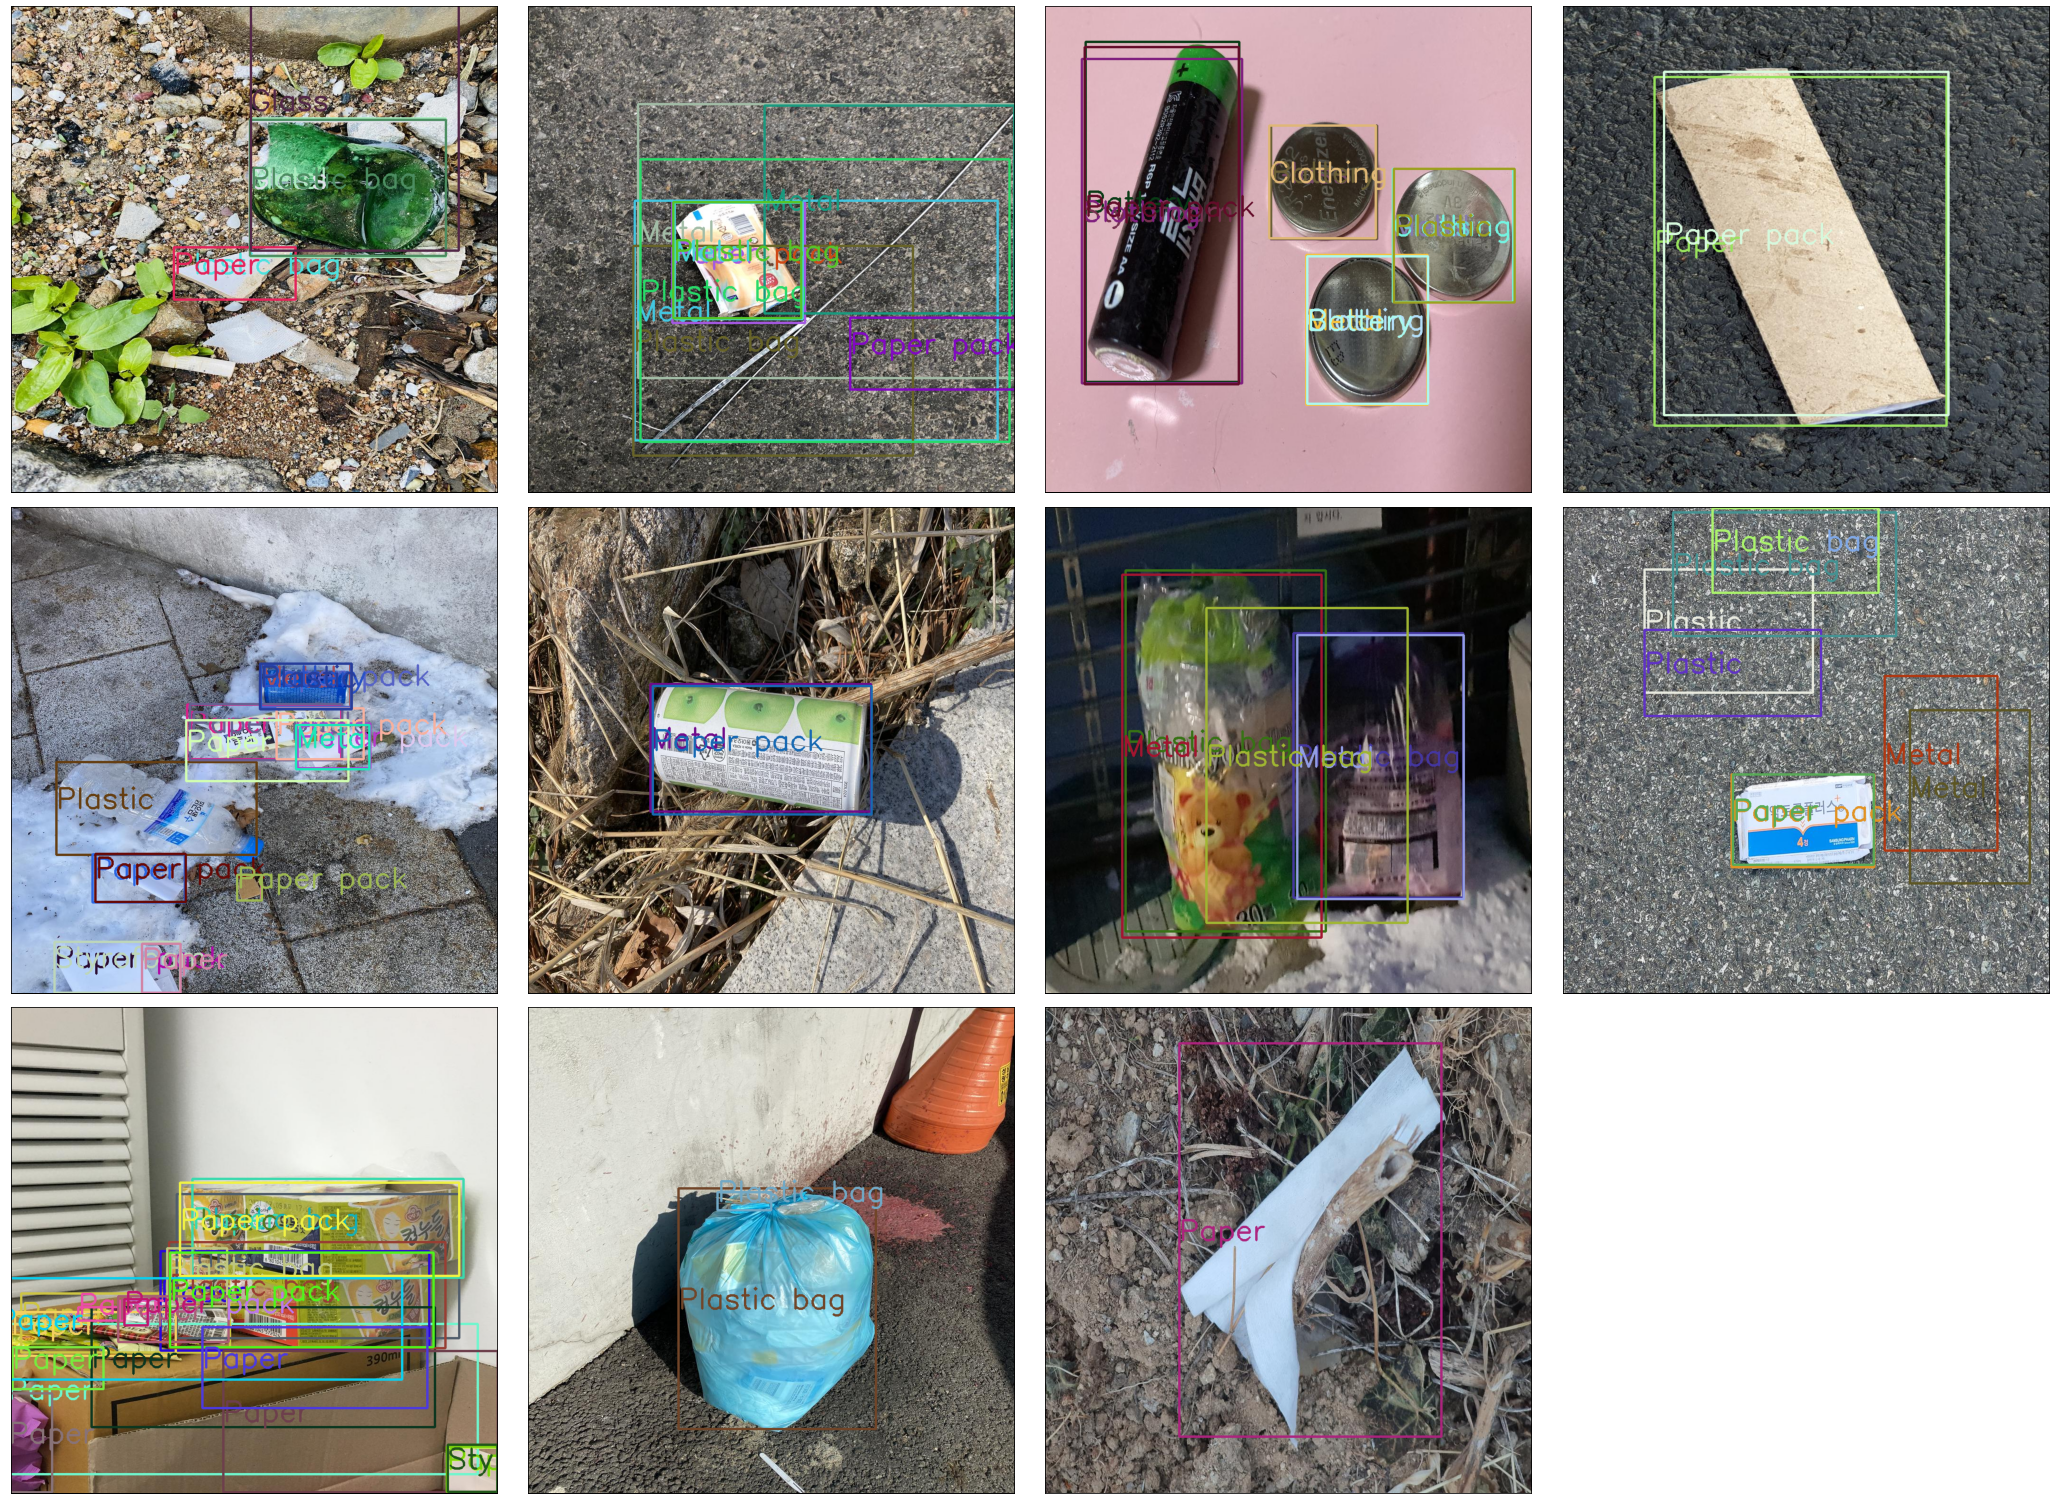

In [32]:
with open('../../../dataset/test.json','r') as f:
    test_json = json.load(f)
dataset_path = '../../../dataset/'
image_list = []
anns_list = []
labels_list = []

# set image range
start = 207
finish = 217
for i in range(start, finish+1) :
    image_number = i
    file_path = get_file_path(test_json, image_number)
    anns, labels = get_annotations(df, image_number)
    image = read_image(dataset_path, file_path)
    image_list.append(image)
    anns_list.append(anns)
    labels_list.append(labels)
    
# plot_box(image)
plot_bbox(image_list, anns_list, labels_list)
